In [8]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def find_key_length(ciphertext, max_key_length=20):
    try:
        ciphertext = ciphertext.upper()
        ic_values = []

        for key_length in range(1, max_key_length + 1):
            blocks = [ciphertext[i::key_length] for i in range(key_length)]
            ic = []
            for block in blocks:
                block_len = len(block)
                if block_len <= 1:
                    continue
                freq_counter = Counter(block)
                ic.append(sum(n * (n - 1) / (block_len * (block_len - 1)) for n in freq_counter.values()))
            if ic:
                ic_values.append(np.mean(ic))
            else:
                ic_values.append(0)

        plt.figure(figsize=(10, 5))
        plt.plot(range(1, max_key_length + 1), ic_values, marker='o', linestyle='-')
        plt.xlabel('Key_lenght')
        plt.ylabel('IC')
        plt.title('Kasisik\'s method (key length): ')
        plt.grid(True)
        plt.show()

        best_guess_key_length = np.argmax(ic_values) + 1
        return best_guess_key_length
    except Exception as e:
        print("Error", str(e))
        return None


In [9]:
ciphertext = "dstvq bzwse mu jmfzpw vyodc mobr gj vyi ibmllmpx egn xwhiuvxmsre arflwmbc. jgvgd micyk zeu sixx xfw mpuyldvw'k wvrrwkvb vyodc mobr wzgi wbxgc llg 1500j, aaor yf ypbrhgr njmpkik dsmc e irpeoc mx xagi txh quvcdfeoh gl xq dedo e rqtg jtxmmkwr dfsd. sx fsw ulvoszcv rqk sgvc dazg tigdypaiu, sym kpqg xjv pxkt gfxq vpxmxpgrkt xrziqwxvzrz, biksmpzrz owqwrvzeevc sfgjrrzoh. gl acj thzyjsvkjiw sr rzi 1960u nmmr xfw vgcitci mx pgkvtcir klgvxl msllekemgq pmjio ztleq nswurkxc, elv qqii kogcfxnp abdl bwwmksi zyzdmuymgq wmxxyrvx vmiw enuyl zeewqcbik sradyfzrz fipkmqew hp pmjio ztleq"


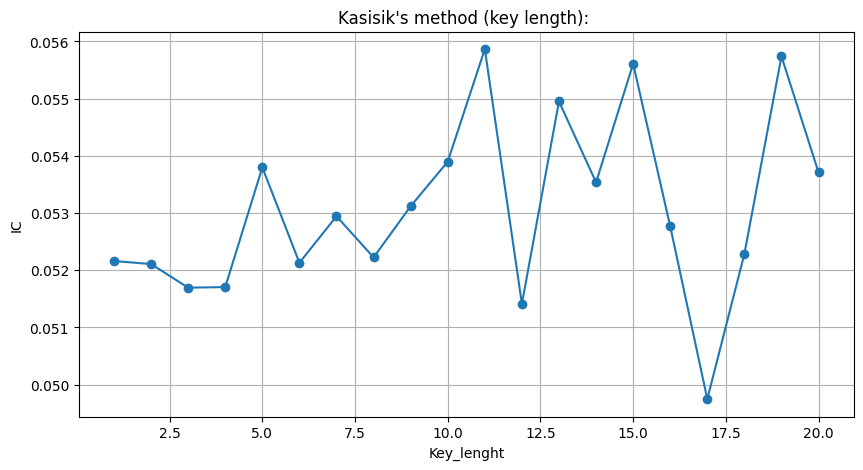

Key_length: 11


In [10]:
key_length = find_key_length(ciphertext)
if key_length is not None:
    print("Key_length:", key_length)